# <a id='toc1_'></a>[**Waze Predictive Model**](#toc0_)
**Course 6 - The nuts and bolts of machine learning**

**Table of contents**<a id='toc0_'></a>    
- [**Waze Predictive Model**](#toc1_)    
  - [**Scenario**](#toc1_1_)    
    - [**Email from Emrick Larson, Finance and Administration Department Head**](#toc1_1_1_)    
    - [**Email from Harriet Hadzic, Director of Data Analysis**](#toc1_1_2_)    
    - [**Data Dictionary**](#toc1_1_3_)    
    - [**Objectives**](#toc1_1_4_)    
  - [**PACE Stages**](#toc1_2_)    
  - [**PACE: Plan**](#toc1_3_)    
    - [**Task 1. Imports and data loading**](#toc1_3_1_)    
  - [**PACE: Analyze**](#toc1_4_)    
    - [**Task 2. Feature engineering**](#toc1_4_1_)    
      - [**`km_per_driving_day`**](#toc1_4_1_1_)    
      - [**`percent_sessions_in_last_month`**](#toc1_4_1_2_)    
      - [**`professional_driver`**](#toc1_4_1_3_)    
      - [**`total_sessions_per_day`**](#toc1_4_1_4_)    
      - [**`km_per_hour`**](#toc1_4_1_5_)    
      - [**`km_per_drive`**](#toc1_4_1_6_)    
      - [**`percent_of_sessions_to_favorite`**](#toc1_4_1_7_)    
    - [**Task 3. Drop missing values**](#toc1_4_2_)    
    - [**Task 4. Outliers**](#toc1_4_3_)    
    - [**Task 5. Variable encoding**](#toc1_4_4_)    
      - [**Dummying features**](#toc1_4_4_1_)    
      - [**Target encoding**](#toc1_4_4_2_)    
    - [**Task 6. Feature selection**](#toc1_4_5_)    
    - [**Task 7. Evaluation metric**](#toc1_4_6_)    
  - [**PACE: Construct**](#toc1_5_)    
    - [**Task 8. Modeling workflow and model selection process**](#toc1_5_1_)    
    - [**Task 9. Split the data**](#toc1_5_2_)    
    - [**Task 10. Modeling**](#toc1_5_3_)    
      - [**Random forest**](#toc1_5_3_1_)    
      - [**XGBoost**](#toc1_5_3_2_)    
    - [**Task 11. Model selection**](#toc1_5_4_)    
      - [**Random forest**](#toc1_5_4_1_)    
      - [**XGBoost**](#toc1_5_4_2_)    
  - [**PACE: Execute**](#toc1_6_)    
    - [**Task 12. Use champion model to predict on test data**](#toc1_6_1_)    
    - [**Task 13. Confusion matrix**](#toc1_6_2_)    
    - [**Task 14. Feature importance**](#toc1_6_3_)    
    - [**Task 15. Conclusion**](#toc1_6_4_)    
    - [**Decision Threshold Optimisation**](#toc1_6_5_)    
      - [**Identify an optimal decision threshold**](#toc1_6_5_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[**Scenario**](#toc0_)

Your team at Waze is close to completing their project for developing a machine learning model to predict user churn. Previously, you completed a project proposal, and used Python to explore and analyze Waze’s user data, create data visualizations, and conduct a hypothesis test. Most recently, you built a binomial logistic regression model based on a variety of variables. 

Leadership appreciates all your hard work. Now, they want your team to build and test different machine learning models to predict user churn. Your work will help leadership make informed business decisions to prevent user churn, improve user retention, and grow Waze’s business.  

At a meeting with project stakeholders, your team suggests building and testing the following machine learning models: random forest and XGBoost. At the end of the meeting, the Operations Manager says that he will share the suggestion with leadership. 

A few days after the meeting, you receive an email from Emrick Larson, Waze’s Finance and Administration Department Head. Emrick says that leadership likes the idea of building and testing the two models to predict user churn, and asks the team to share more details about the models. You also receive a follow-up email from Harriet Hadzic, the Director of Data Analysis. Harriet asks you to build the two models, and prepare an executive summary to share your results. 

### <a id='toc1_1_1_'></a>[**Email from Emrick Larson, Finance and Administration Department Head**](#toc0_)

**Subject:** Approval of Algorithm

**From:** "Emrick Larson," Emrick@Waze

**Cc:** "Harriet Hadzic," Harriet@waze, "Chidi Ga," Chidi@waze, "Sylvester Esperanza," Sylvester@Waze, "May Santner," May@Waze; "Ursula Sayo," Ursula@Waze

Hello Data Team,

Thank you for providing the details for the final phase of the prediction algorithm we have requested. I apologize for missing many of the weekly project meetings, but I’ve been keeping informed of your progress. We discussed in detail your proposal for building and testing the following models for prediction: random forest and XGBoost. We agree with this approach. 

Please go ahead with the creation of the algorithm. It would be very helpful if you could share what data indicators the algorithm is based on, and describe the confidence your team has in the model performance  

Thank you for your great work,

Emrick Larson

Finance and Administration Department Head

Waze

### <a id='toc1_1_2_'></a>[**Email from Harriet Hadzic, Director of Data Analysis**](#toc0_)

**Subject:** RE: Aprroval of Algorithm

**From:** "Harriet Hadzic," Harriet@waze

**Cc:** "Chidi Ga," Chidi@waze

Hello data pros!

Great work so far. The results of your analysis will help us make data-driven business decisions. 

Please build the models we discussed using the Waze user data. As you’re aware, you’ve already cleaned and run this data through a binomial logistic regression model, but you always need to validate your variables and data. So, please revisit the dataset.

Once complete, please send a draft of your executive summary to May and myself. Be sure to include the key info that leadership requested: a summary of the variables used to make the prediction, and an indication of how we can test the accuracy of the model. 

I look forward to seeing what you build! 

Harriet Hadzic

Director of Data Analysis

Waze

### <a id='toc1_1_3_'></a>[**Data Dictionary**](#toc0_)

**Waze dataset overview**

This project uses a dataset called `waze_dataset.csv`. It contains synthetic data created for this project in partnership with Waze. Examine each data variable gathered.

This dataset contains:

**14,999 rows** - each row represents one unique user

**13 columns**

| Column name                 | Type  | Description                                                                 |
|----------------------------|-------|-----------------------------------------------------------------------------|
| ID                         | int   | A sequential numbered index                                                 |
| label                      | obj   | Binary target variable (“retained” vs “churned”) indicating user churn status during the month |
| sessions                   | int   | Number of times a user opened the app during the month                      |
| drives                     | int   | Number of occurrences where a user drove at least 1 km during the month    |
| device                     | obj   | Type of device used to start a session (e.g., Android or iPhone)            |
| total_sessions             | float | Model-estimated total number of sessions since the user onboarded           |
| n_days_after_onboarding    | int   | Number of days since the user signed up for the app                          |
| total_navigations_fav1     | int   | Total navigations since onboarding to the user’s favorite location 1        |
| total_navigations_fav2     | int   | Total navigations since onboarding to the user’s favorite location 2        |
| driven_km_drives           | float | Total kilometers driven during the month                                    |
| duration_minutes_drives    | float | Total duration driven (in minutes) during the month                         |
| activity_days              | int   | Number of days the user opened the app during the month                     |
| driving_days               | int   | Number of days the user drove at least 1 km during the month                |


### <a id='toc1_1_4_'></a>[**Objectives**](#toc0_)

**The purpose** of this model is to find factors that drive user churn.

**The goal** of this model is to predict whether or not a Waze user is retained or churned.

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

## <a id='toc1_2_'></a>[**PACE Stages**](#toc0_)

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

## <a id='toc1_3_'></a>[**PACE: Plan**](#toc0_)

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:

1.   What are you being asked to do?


2.   What are the ethical implications of the model? What are the consequences of your model making errors?
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a Waze user won't churn, but they actually will)?
  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a Waze user will churn, but they actually won't)?

3.  Do the benefits of such a model outweigh the potential problems?
4.  Would you proceed with the request to build this model? Why or why not?


**Answer**

1. I am being asked to prepare the data for modelling, compute feature engineering and to build two tree-based models and evaluate their performance to classify whether a user will churn or be retained.
   
2. The consequence of the model making an error is that a user could leave the app and have no preventable actions taken. The effect that the model will have when it predicts a false negative is that a user will leave Waze and Waze will fail to take proactive measures in order to retain users who are likely to stop using the app. These measures might be to push an application notification to users or to send a user survey to better understand their dissatisfaction. The effect a model has when making a false positive is that the user who will still stay with Waze but will have the proactive measures in place still, which can lead to an annoying or negative experience for the loyal users of Waze.

3. Yes, the benefits outweigh the risks as it will lead to more users being with Waze for their journeys. The proactive measures by Waze may have unintended effects on the users which in turn may enhance user churn. Therefore, a follow up analysis on the effectiveness of the proactive measures is highly recommended and if they are reasonable and effective then again yes, the benefits do outweigh the risks.

4. Yes I would proceed with the request to build this model as I think it will be extremely beneficial to the Waze team and will in fact help to reduce user churn. Additionally, there is no significant risks for constructing a model.

### <a id='toc1_3_1_'></a>[**Task 1. Imports and data loading**](#toc0_)

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np
# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)
# Import packages for data modeling
from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# This is the function that helps plot feature importance
from xgboost import plot_importance
# # This module lets us save our models once we fit them.
import pickle

Now read in the dataset as `df0` and inspect the first five rows.

In [2]:
df0 = pd.read_csv('waze_dataset.csv')

In [3]:
df0.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


## <a id='toc1_4_'></a>[**PACE: Analyze**](#toc0_)

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### <a id='toc1_4_1_'></a>[**Task 2. Feature engineering**](#toc0_)

You have already prepared much of this data and performed exploratory data analysis (EDA) in previous courses. You know that some features had stronger correlations with churn than others, and you also created some features that may be useful.

In this part of the project, you'll engineer these features and some new features to use for modeling.

To begin, create a copy of `df0` to preserve the original dataframe. Call the copy `df`.

In [4]:
df = df0.copy()

Call `info()` on the new dataframe so the existing columns can be easily referenced.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


#### <a id='toc1_4_1_1_'></a>[**`km_per_driving_day`**](#toc0_)

1. Create a feature representing the mean number of kilometers driven on each driving day in the last month for each user. Add this feature as a column to `df`.

2. Get descriptive statistics for this new feature



In [6]:
# 1. Create `km_per_driving_day` feature
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']
# 2. Get descriptive stats
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

Notice that some values are infinite. This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [7]:
# 1. Convert infinite values to zero
df['km_per_driving_day'] = df['km_per_driving_day'].replace(np.inf, 0)
# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

#### <a id='toc1_4_1_2_'></a>[**`percent_sessions_in_last_month`**](#toc0_)

1. Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

2. Get descriptive statistics for this new feature

In [8]:
# 1. Create `percent_sessions_in_last_month` feature
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

# 1. Get descriptive stats
df['percent_sessions_in_last_month'].describe()

count    14999.000000
mean         0.449255
std          0.286919
min          0.000000
25%          0.196221
50%          0.423097
75%          0.687216
max          1.530637
Name: percent_sessions_in_last_month, dtype: float64

#### <a id='toc1_4_1_3_'></a>[**`professional_driver`**](#toc0_)

Create a new, binary feature called `professional_driver` that is a 1 for users who had 60 or more drives <u>**and**</u> drove on 15+ days in the last month.

**Note:** The objective is to create a new feature that separates professional drivers from other drivers. In this scenario, domain knowledge and intuition are used to determine these deciding thresholds, but ultimately they are arbitrary.

To create this column, use the [`np.where()`](https://numpy.org/doc/stable/reference/generated/numpy.where.html) function. This function accepts as arguments:
1. A condition
2. What to return when the condition is true
3. What to return when the condition is false

```
Example:
x = [1, 2, 3]
x = np.where(x > 2, 100, 0)
x
array([  0,   0, 100])
```

In [9]:
# Create `professional_driver` feature
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

#### <a id='toc1_4_1_4_'></a>[**`total_sessions_per_day`**](#toc0_)

Now, create a new column that represents the mean number of sessions per day _since onboarding_.

In [10]:
# Create `total_sessions_per_day` feature
df['total_sessions_per_day'] = df['total_sessions'] / df['n_days_after_onboarding']

As with other features, get descriptive statistics for this new feature.

In [11]:
df['total_sessions_per_day'].describe()

count    14999.000000
mean         0.338698
std          1.314333
min          0.000298
25%          0.051037
50%          0.100775
75%          0.216269
max         39.763874
Name: total_sessions_per_day, dtype: float64

#### <a id='toc1_4_1_5_'></a>[**`km_per_hour`**](#toc0_)

Create a column representing the mean kilometers per hour driven in the last month.

In [12]:
# Create `km_per_hour` feature
df['km_per_hour'] = df['driven_km_drives'] / (df['duration_minutes_drives'] / 60)
df['km_per_hour'].describe()

count    14999.000000
mean       190.394608
std        334.674026
min         72.013095
25%         90.706222
50%        122.382022
75%        193.130119
max      23642.920871
Name: km_per_hour, dtype: float64

#### <a id='toc1_4_1_6_'></a>[**`km_per_drive`**](#toc0_)

Create a column representing the mean number of kilometers per drive made in the last month for each user. Then, print descriptive statistics for the feature.

In [13]:
# Create `km_per_drive` feature
df['km_per_drive'] = df['driven_km_drives'] / df['drives']

This feature has infinite values too. Convert the infinite values to zero, then confirm that it worked.

In [14]:
# 1. Convert infinite values to zero
df['km_per_drive'] = df['km_per_drive'].replace(np.inf, 0)

# 2. Confirm that it worked
df['km_per_drive'].describe()

count    14999.000000
mean       232.817946
std        620.622351
min          0.000000
25%         32.424301
50%         72.854343
75%        179.347527
max      15777.426560
Name: km_per_drive, dtype: float64

#### <a id='toc1_4_1_7_'></a>[**`percent_of_sessions_to_favorite`**](#toc0_)

Finally, create a new column that represents the percentage of total sessions that were used to navigate to one of the users' favorite places. Then, print descriptive statistics for the new column.

This is a proxy representation for the percent of overall drives that are to a favorite place. Since total drives since onboarding are not contained in this dataset, total sessions must serve as a reasonable approximation.

People whose drives to non-favorite places make up a higher percentage of their total drives might be less likely to churn, since they're making more drives to less familiar places.

In [15]:
# Create `percent_of_sessions_to_favorite` feature
df['percent_of_sessions_to_favorite'] = (df['total_navigations_fav1'] + df['total_navigations_fav2']) / df['total_sessions']

# Get descriptive stats
df['percent_of_sessions_to_favorite'].describe()

count    14999.000000
mean         1.665439
std          8.865666
min          0.000000
25%          0.203471
50%          0.649818
75%          1.638526
max        777.563629
Name: percent_of_sessions_to_favorite, dtype: float64

### <a id='toc1_4_2_'></a>[**Task 3. Drop missing values**](#toc0_)

Because you know from previous EDA that there is no evidence of a non-random cause of the 700 missing values in the `label` column, and because these observations comprise less than 5% of the data, use the `dropna()` method to drop the rows that are missing this data.

In [16]:
# Drop rows with missing values
df = df.dropna(subset=['label'])

### <a id='toc1_4_3_'></a>[**Task 4. Outliers**](#toc0_)

You know from previous EDA that many of these columns have outliers. However, tree-based models are resilient to outliers, so there is no need to make any imputations.

### <a id='toc1_4_4_'></a>[**Task 5. Variable encoding**](#toc0_)

#### <a id='toc1_4_4_1_'></a>[**Dummying features**](#toc0_)

In order to use `device` as an X variable, you will need to convert it to binary, since this variable is categorical.

In cases where the data contains many categorical variables, you can use pandas built-in [`pd.get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), or you can use scikit-learn's [`OneHotEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) function.

**Note:** Each possible category of each feature will result in a feature for your model, which could lead to an inadequate ratio of features to observations and/or difficulty understanding your model's predictions.

Because this dataset only has one remaining categorical feature (`device`), it's not necessary to use one of these special functions. You can just implement the transformation directly.

Create a new, binary column called `device2` that encodes user devices as follows:

* `Android` -> `0`
* `iPhone` -> `1`

In [17]:
# Create new `device2` variable
df['device2'] = np.where(df['device'] == 'Android', 0, 1)
df[['device', 'device2']].tail()

,device,device2
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1


#### <a id='toc1_4_4_2_'></a>[**Target encoding**](#toc0_)

The target variable is also categorical, since a user is labeled as either "churned" or "retained." Change the data type of the `label` column to be binary. This change is needed to train the models.

Assign a `0` for all `retained` users.

Assign a `1` for all `churned` users.

Save this variable as `label2` so as not to overwrite the original `label` variable.

**Note:** There are many ways to do this. Consider using `np.where()` as you did earlier in this notebook.

In [18]:
# Create binary `label2` column
df['label2'] = df['label'].map({'retained': 0,
                                'churned': 1})
df[['label', 'label2']].tail()

,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


### <a id='toc1_4_5_'></a>[**Task 6. Feature selection**](#toc0_)

Tree-based models can handle multicollinearity, so the only feature that can be cut is `ID`, since it doesn't contain any information relevant to churn.

Note, however, that `device` won't be used simply because it's a copy of `device2`.

Drop `ID` from the `df` dataframe.

In [19]:
# Drop `ID` column
df = df.drop(['ID'], axis=1)

### <a id='toc1_4_6_'></a>[**Task 7. Evaluation metric**](#toc0_)

Before modeling, you must decide on an evaluation metric. This will depend on the class balance of the target variable and the use case of the model.

First, examine the class balance of your target variable.

In [20]:
# Get class balance of 'label' col
df['label'].value_counts(normalize=True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

Approximately 18% of the users in this dataset churned. This is an unbalanced dataset, but not extremely so. It can be modeled without any class rebalancing.

Now, consider which evaluation metric is best. Remember, accuracy might not be the best gauge of performance because a model can have high accuracy on an imbalanced dataset and still fail to predict the minority class.

It was already determined that the risks involved in making a false positive prediction are minimal. No one stands to get hurt, lose money, or suffer any other significant consequence if they are predicted to churn. Therefore, select the model based on the recall score.

## <a id='toc1_5_'></a>[**PACE: Construct**](#toc0_)

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### <a id='toc1_5_1_'></a>[**Task 8. Modeling workflow and model selection process**](#toc0_)

The final modeling dataset contains 14,299 samples. This is towards the lower end of what might be considered sufficient to conduct a robust model selection process, but still doable.

1. Split the data into train/validation/test sets (60/20/20)

Note that, when deciding the split ratio and whether or not to use a validation set to select a champion model, consider both how many samples will be in each data partition, and how many examples of the minority class each would therefore contain. In this case, a 60/20/20 split would result in \~2,860 samples in the validation set and the same number in the test set, of which \~18%&mdash;or 515 samples&mdash;would represent users who churn.

2. Fit models and tune hyperparameters on the training set
   
3. Perform final model selection on the validation set
   
4. Assess the champion model's performance on the test set

![](https://raw.githubusercontent.com/adacert/tiktok/main/optimal_model_flow_numbered.svg)

### <a id='toc1_5_2_'></a>[**Task 9. Split the data**](#toc0_)

Now you're ready to model. The only remaining step is to split the data into features/target variable and training/validation/test sets.

1. Define a variable `X` that isolates the features. Remember not to use `device`.

2. Define a variable `y` that isolates the target variable (`label2`).

3. Split the data 80/20 into an interim training set and a test set. Don't forget to stratify the splits, and set the random state to 42.

4. Split the interim training set 75/25 into a training set and a validation set, yielding a final ratio of 60/20/20 for training/validation/test sets. Again, don't forget to stratify the splits and set the random state.

In [21]:
# 1. Isolate X variables
X = df.copy()
X = X.drop(['label', 'label2', 'device'], axis=1)

# 2. Isolate y variable
y = df['label2']

# 3. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 4. Split into train and validate sets
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.25, random_state=42)

Verify the number of samples in the partitioned data.

In [22]:
print(f'X_tr shape:', X_tr.shape)
print(f'X_val shape:', X_val.shape)
print(f'X_test shape:', X_test.shape)
print()
print(f'y_tr shape:', y_tr.shape)
print(f'y_val shape:', y_val.shape)
print(f'y_test shape:', y_test.shape)

X_tr shape: (8579, 18)
X_val shape: (2860, 18)
X_test shape: (2860, 18)

y_tr shape: (8579,)
y_val shape: (2860,)
y_test shape: (2860,)


This aligns with expectations.

### <a id='toc1_5_3_'></a>[**Task 10. Modeling**](#toc0_)

#### <a id='toc1_5_3_1_'></a>[**Random forest**](#toc0_)

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take.
 - `max_depth`
 - `max_features`
 - `max_samples`
 - `min_samples_leaf`
 - `min_samples_split`
 - `n_estimators`

3. Define a list `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf_cv`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)

 `refit` should be set to `'recall'`.<font/>


**Note:** If your model fitting takes too long, try reducing the number of options to search over in the grid search.

In [23]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [2, 5, 10, None],
             'min_samples_split': [2, 10, 50],
             'min_samples_leaf': [1, 5, 25],
             'n_estimators': [50, 100, 200],
             'max_features': [2, 3, 6],
             'max_samples': [0.25, 0.5, 1]
             }
# 3. Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

Now fit the model to the training data.

In [24]:
%%time
rf_cv.fit(X_tr, y_tr)

c:\Users\alexa\anaconda3\envs\google_advanced_data_analytics\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alexa\anaconda3\envs\google_advanced_data_analytics\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alexa\anaconda3\envs\google_advanced_data_analytics\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

CPU times: total: 1h 18min 9s
Wall time: 1h 23min 54s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 5, 10, None],
                         'max_features': [2, 3, 6],
                         'max_samples': [0.25, 0.5, 1],
                         'min_samples_leaf': [1, 5, 25],
                         'min_samples_split': [2, 10, 50],
                         'n_estimators': [50, 100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [25]:
path = "E:/My Portfolio/Cummulative Case Studies/Waze/"

In [ ]:
with open(path + 'rf_cv.pickle', 'wb') as to_write:
    pickle.dump(rf_cv, to_write)

In [27]:
with open(path + 'rf_cv.pickle', 'rb') as to_read:
    rf_cv = pickle.load(to_read)

Examine the best average score across all the validation folds.

In [28]:
rf_cv.best_score_

np.float64(0.11169327006039691)

Examine the best combination of hyperparameters.

In [29]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 6,
 'max_samples': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

Use the `make_results()` function to output all of the scores of your model. Note that the function accepts three arguments.

To learn more about how this function accesses the cross-validation results, refer to the [`GridSearchCV` scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV) for the `cv_results_` attribute.

In [30]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

Pass the `GridSearch` object to the `make_results()` function.

In [31]:
results = make_results('rf_cv', rf_cv, 'recall')
results

,model,precision,recall,F1,accuracy
0,rf_cv,0.499263,0.111693,0.182322,0.82224


Asside from the accuracy, the scores aren't that good. However, recall that when you built the logistic regression model in the last course the recall was \~0.09, which means that this model has a better recall and about the same accuracy, and it was trained on less data.

If you want, feel free to try retuning your hyperparameters to try to get a better score. You might be able to marginally improve the model.

#### <a id='toc1_5_3_2_'></a>[**XGBoost**](#toc0_)

 Try to improve your scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a list `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb_cv`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='recall'`)

In [32]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [2, 5, 10, None],
             'min_child_weight': [4, 6, 8, 10],
             'learning_rate': [0.1, 0.2, 0.3, 0.5],
             'n_estimators': [50, 100, 200],
             'colsample_bytree': [0.25, 0.5, 0.75]
             }

# 3. Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

Now fit the model to the `X_tr` and `y_tr` data.

Note this cell might take several minutes to run.

In [33]:
%%time
xgb_cv.fit(X_tr, y_tr)

CPU times: total: 2h 20min 20s
Wall time: 36min 54s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.25, 0.5, 0.75],
                         'learning_rate': [0.1, 0.2, 0.3, 0.5],
                         'max_depth': [2, 5, 10, None],
                         'min_child_weight': [4, 6, 8, 10],
                         'n_estimators': [50, 100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
# Save as a pickle
with open(path + 'xgb_cv.pickle', 'wb') as to_write:
    pickle.dump(xgb_cv, to_write)

In [35]:
# Read in the pickle
with open(path + 'xgb_cv.pickle', 'rb') as to_read:
    xgb_cv = pickle.load(to_read)

Get the best score from this model.

In [36]:
xgb_cv.best_score_

np.float64(0.21683563416738566)

And the best parameters.

In [37]:
xgb_cv.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.5,
 'max_depth': 10,
 'min_child_weight': 10,
 'n_estimators': 200}

Use the `make_results()` function to output all of the scores of your model. Note that the function accepts three arguments.

In [38]:
xgb_cv_results = make_results('xgb_cv', xgb_cv, 'recall')
results = pd.concat([results, xgb_cv_results])
results

,model,precision,recall,F1,accuracy
0,rf_cv,0.499263,0.111693,0.182322,0.822240
0,xgb_cv,0.382083,0.216836,0.276378,0.798694


This model fit the data even better than the random forest model. The recall score is slightly more than double the recall score from the logistic regression model from the previous course, and it's almost two times the random forest model's recall score, while maintaining a similar accuracy and precision score.

### <a id='toc1_5_4_'></a>[**Task 11. Model selection**](#toc0_)

Now, use the best random forest model and the best XGBoost model to predict on the validation data. Whichever performs better will be selected as the champion model.

#### <a id='toc1_5_4_1_'></a>[**Random forest**](#toc0_)

In [39]:
# Use random forest model to predict on validation data
rf_val_pred = rf_cv.best_estimator_.predict(X_val)

Use the `get_test_scores()` function to generate a table of scores from the predictions on the validation data.

In [40]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [41]:
rf_val_results = get_test_scores('rf_cv_val', rf_val_pred, y_val)
results = pd.concat([results, rf_val_results])
results

,model,precision,recall,F1,accuracy
0,rf_cv,0.499263,0.111693,0.182322,0.822240
0,xgb_cv,0.382083,0.216836,0.276378,0.798694
0,rf_cv_val,0.446154,0.114398,0.182104,0.817832


Notice that the scores went down from the training scores across all metrics, but only by very little. This means that the model did not overfit the training data.

#### <a id='toc1_5_4_2_'></a>[**XGBoost**](#toc0_)

Now, do the same thing to get the performance scores of the XGBoost model on the validation data.

In [42]:
xgb_val_pred = xgb_cv.best_estimator_.predict(X_val)

In [43]:
xgb_val_results = get_test_scores('xgb_cv_val', xgb_val_pred, y_val)
results = pd.concat([results, xgb_val_results])
results

,model,precision,recall,F1,accuracy
0,rf_cv,0.499263,0.111693,0.182322,0.822240
0,xgb_cv,0.382083,0.216836,0.276378,0.798694
0,rf_cv_val,0.446154,0.114398,0.182104,0.817832
0,xgb_cv_val,0.364261,0.209073,0.265664,0.795105


Just like with the random forest model, the XGBoost model's validation scores were lower, but only very slightly. It is still the clear champion.

## <a id='toc1_6_'></a>[**PACE: Execute**](#toc0_)

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### <a id='toc1_6_1_'></a>[**Task 12. Use champion model to predict on test data**](#toc0_)

Now, use the champion model to predict on the test dataset. This is to give a final indication of how you should expect the model to perform on new future data, should you decide to use the model.

In [44]:
# Use XGBoost model to predict on test data
test_preds = xgb_cv.best_estimator_.predict(X_test)

# Get test scores for XGBoost model
test_results = get_test_scores('xgb_cv_test', test_preds, y_test)

# Append to the results table
results = pd.concat([results, test_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,rf_cv,0.499263,0.111693,0.182322,0.822240
0,xgb_cv,0.382083,0.216836,0.276378,0.798694
0,rf_cv_val,0.446154,0.114398,0.182104,0.817832
0,xgb_cv_val,0.364261,0.209073,0.265664,0.795105
0,xgb_cv_test,0.370370,0.216963,0.273632,0.795804


In [45]:
results.to_csv("Model Evalutation Metrics.csv", index=False)

The recall was nearly exactly the same as it was on the validation data, but the precision increased slightly, which caused all of the other scores to rise slightly. Nonetheless, this is stil within the acceptable range for performance discrepancy between validation and test scores.

### <a id='toc1_6_2_'></a>[**Task 13. Confusion matrix**](#toc0_)

Plot a confusion matrix of the champion model's predictions on the test data.

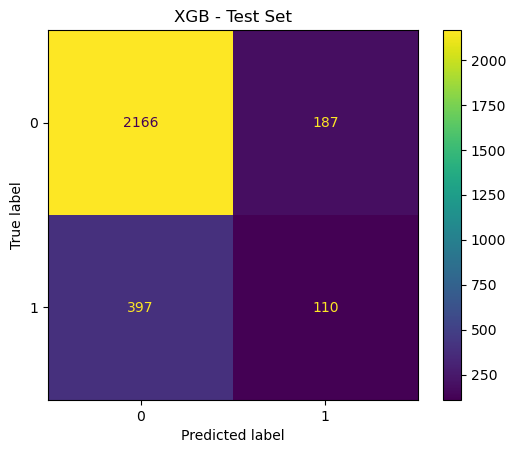

In [46]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, test_preds, labels=xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)
disp.plot()
plt.title("XGB - Test Set")
plt.show()

The model predicted slightly more than twice as many false negatives than it did false positives, and it correctly identified only 21.7% of the users who actually churned.

### <a id='toc1_6_3_'></a>[**Task 14. Feature importance**](#toc0_)

Use the `plot_importance` function to inspect the most important features of your final model.

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

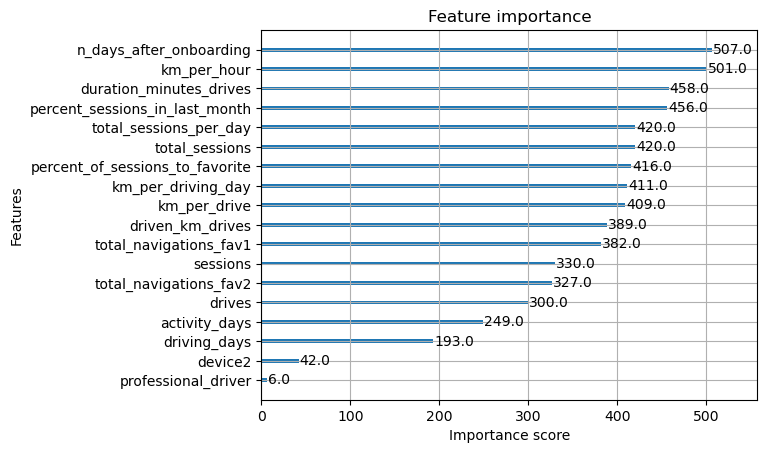

In [47]:
plot_importance(xgb_cv.best_estimator_)

The XGBoost model made more use of many of the features than did the logistic regression model from the previous course, which weighted a single feature (`activity_days`) very heavily in its final prediction.

If anything, this underscores the importance of feature engineering. Notice that engineered features accounted for six of the top 10 features (and three of the top five). Feature engineering is often one of the best and easiest ways to boost model performance.

Also, note that the important features in one model might not be the same as the important features in another model. That's why you shouldn't discount features as unimportant without thoroughly examining them and understanding their relationship with the dependent variable, if possible. These discrepancies between features selected by models are typically caused by complex feature interactions.

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.

Even if you cannot use the model to make strong predictions, was the work done in vain? What insights can you report back to stakeholders?

### <a id='toc1_6_4_'></a>[**Task 15. Conclusion**](#toc0_)

Now that you've built and tested your machine learning models, the next step is to share your findings with the Waze leadership team. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. Would you recommend using this model for churn prediction? Why or why not?

2. What tradeoff was made by splitting the data into training, validation, and test sets as opposed to just training and test sets?

3. What is the benefit of using a logistic regression model over an ensemble of tree-based models (like random forest or XGBoost) for classification tasks?

4. What is the benefit of using an ensemble of tree-based models like random forest or XGBoost over a logistic regression model for classification tasks?

5. What could you do to improve this model?

6. What additional features would you like to have to help improve the model?

**Answer**

1. This is dependent upon what the model is being used for, if the model is being used for the main business objective to predict user churn and to drive consequential business decisions, then no as it is not suitable as a predictor as made clear by the many false negatives and missclassifications. In constrast, if this model is to be used for exploratory purposes, then yes as it can help develop further insight and improved modelling that may achieve the final objective.

2. The tradeoff was that by splitting the data into 3 ways there is in turn less data for the model to be trained on compared with just splitting the data two ways. In return, when performing model selection on a seperate validation set, this enables for the chosen champion model to be tested again on the test set which gives a better estimate of the models future performance on unseen data. This better estimate of the models future performance and certainty is much better than the estimated model performance from splitting the data two ways and performing model selection of a champion model on the test set. Therefore, the tradeoff is that although you get less data to train the model with in turn you get to see how the model reacts to unseen test data and you get a better estimate of the champion models performance on unseen test data.

3. The benefit of logistic regression models over ensemble tree-based models for classification tasks is that they are easier to interpret. This is due to the logistic regression model assigning coefficients to the predictor variables which reveals not only which variables factored the most heavily into the models final predictions but also the directionality of the weight. This means that they reveal whether the variable is positively or negatively correlated with the target variable in the final models predictions.

4. The benefit of using a ensemble tree-based model over a logistic regression model is that the tree-based models are often better predictors. Thereby if the most important objective of the project is predictive power of the model, then the tree-based models will usually out perform the logistic regression model, but this is not always the case. Tree-based models also require less data cleaning and have fewer assumptions about the underlying distributions of the variables, hence making them easy to work with.

5. To improve the models performance new features could be engineered in order to try to generate a better predictive signal as is often the case if you have domain knowledge. In regards to this model, the features that were already engineered for this model made up over half of the top 10 most predictive features for the model. It can also be usefull to reconstruct the model with different combinations of predictor variables in order to reduce the noise from unpredictive features.

6. The additional features I would have in order to improve the model is drive level information for each user via drive times, geographic locations, etc. It can also be helpful to have more granular data to know how the users interact with the app such as if they report road hazards or roadworks. Finally, it can be usefull to know the monthly count of unique starting and ending locations of each drivers inputs for their journeys.

### <a id='toc1_6_5_'></a>[**Decision Threshold Optimisation**](#toc0_)

**Note:** The following steps are not required for this project deliverable but is done for exploratory and learning reasons.

#### <a id='toc1_6_5_1_'></a>[**Identify an optimal decision threshold**](#toc0_)

The default decision threshold for most implementations of classification algorithms&mdash;including scikit-learn's&mdash;is 0.5. This means that, in the case of the Waze models, if they predicted that a given user had a 50% probability or greater of churning, then that user was assigned a predicted value of `1`&mdash;the user was predicted to churn.

With imbalanced datasets where the response class is a minority, this threshold might not be ideal. You learned that a precision-recall curve can help to visualize the trade-off between your model's precision and recall.

Here's the precision-recall curve for the XGBoost champion model on the test data.

In [48]:
from sklearn.metrics import PrecisionRecallDisplay

Text(0.5, 1.0, 'Precision-Recall Curve, XGBoost Model')

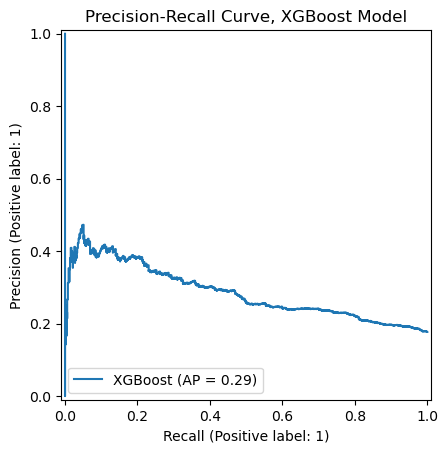

In [49]:
display = PrecisionRecallDisplay.from_estimator(xgb_cv.best_estimator_, X_test, y_test, name='XGBoost')
plt.title("Precision-Recall Curve, XGBoost Model")

As recall increases, precision decreases. But what if you determined that false positives aren't much of a problem? For example, in the case of this Waze project, a false positive could just mean that a user who will not actually churn gets an email and a banner notification on their phone. It's very low risk.

So, what if instead of using the default 0.5 decision threshold of the model, you used a lower threshold?

Here's an example where the threshold is set to 0.4:

In [50]:
predicted_probabilities = xgb_cv.best_estimator_.predict_proba(X_test)
predicted_probabilities

array([[9.9368924e-01, 6.3107815e-03],
       [5.2812135e-01, 4.7187868e-01],
       [9.9922538e-01, 7.7459676e-04],
       ...,
       [6.8430638e-01, 3.1569362e-01],
       [9.8013031e-01, 1.9869674e-02],
       [2.9587954e-01, 7.0412046e-01]], shape=(2860, 2), dtype=float32)

The `predict_proba()` method returns a 2-D array of probabilities where each row represents a user. The first number in the row is the probability of belonging to the negative class, the second number in the row is the probability of belonging to the positive class. (Notice that the two numbers in each row are complimentary to each other and sum to one.)

You can generate new predictions based on this array of probabilities by changing the decision threshold for what is considered a positive response. For example, the following code converts the predicted probabilities to {0, 1} predictions with a threshold of 0.4. In other words, any users who have a value ≥ 0.4 in the second column will get assigned a prediction of `1`, indicating that they churned.

In [51]:
probs = [x[1] for x in predicted_probabilities]

new_preds = np.array([1 if x >= 0.4 else 0 for x in probs])
new_preds

array([0, 1, 0, ..., 0, 0, 1], shape=(2860,))

In [52]:
xgb_cv_threshold_results = get_test_scores('xgb_cv_threshold_0.4', new_preds, y_test)
results = pd.concat([results, xgb_cv_threshold_results])
results

,model,precision,recall,F1,accuracy
0,rf_cv,0.499263,0.111693,0.182322,0.822240
0,xgb_cv,0.382083,0.216836,0.276378,0.798694
0,rf_cv_val,0.446154,0.114398,0.182104,0.817832
0,xgb_cv_val,0.364261,0.209073,0.265664,0.795105
0,xgb_cv_test,0.370370,0.216963,0.273632,0.795804
0,xgb_cv_threshold_0.4,0.337731,0.252465,0.288939,0.779720


Recall and F1-Score increased significantly, while precision and accuracy decreased marginally.

So, using the precision-recall curve as a guide, suppose you knew that you'd be satisfied if the model had a recall score of 0.5 and you were willing to accept the \~30% precision score that comes with it. In other words, you'd be happy if the model successfully identified half of the people who will actually churn, even if it means that when the model says someone will churn, it's only correct about 30% of the time.

What threshold will yield this result? There are a number of ways to determine this. Here's one way to do it using a function.

In [53]:
def threshold_finder(y_test_data, probabilities, desired_recall):
    '''
    Find the decision threshold that most closely yields a desired recall score.

    Inputs:
        y_test_data: Array of true y values
        probabilities: The results of the `predict_proba()` model method
        desired_recall: The recall that you want the model to have

    Outputs:
        threshold: The decision threshold that most closely yields the desired recall
        recall: The exact recall score associated with `threshold`
    '''
    probs = [x[1] for x in probabilities]  # Isolate second column of `probabilities`
    thresholds = np.arange(0, 1, 0.001)    # Set a grid of 1,000 thresholds to test

    scores = []
    for threshold in thresholds:
        # Create a new array of {0, 1} predictions based on new threshold
        preds = np.array([1 if x >= threshold else 0 for x in probs])
        # Calculate recall score for that threshold
        recall = recall_score(y_test_data, preds)
        # Append the threshold and its corresponding recall score as a tuple to `scores`
        scores.append((threshold, recall))

    distances = []
    for idx, score in enumerate(scores):
        # Calculate how close each actual score is to the desired score
        distance = abs(score[1] - desired_recall)
        # Append the (index#, distance) tuple to `distances`
        distances.append((idx, distance))

    # Sort `distances` by the second value in each of its tuples (least to greatest)
    sorted_distances = sorted(distances, key=lambda x: x[1], reverse=False)
    # Identify the tuple with the actual recall closest to desired recall
    best = sorted_distances[0]
    # Isolate the index of the threshold with the closest recall score
    best_idx = best[0]
    # Retrieve the threshold and actual recall score closest to desired recall
    threshold, recall = scores[best_idx]

    return threshold, recall


Now, test the function to find the threshold that results in a recall score closest to 0.5.

In [54]:
probabilities = xgb_cv.best_estimator_.predict_proba(X_test)

threshold_finder(y_test, probabilities, 0.5)

(np.float64(0.077), 0.5009861932938856)

Setting a threshold of 0.077 will result in a recall of 0.500.

To verify, you can repeat the steps performed earlier to get the other evaluation metrics for when the model has a threshold of 0.077. Based on the precision-recall curve, a 0.5 recall score should have a precision of \~0.3.

In [55]:
probs = [x[1] for x in probabilities]
new_preds = np.array([1 if x >=0.077 else 0 for x in probs])
xgb_cv_thresh_results = get_test_scores('xgb_cv_threshold_0.077', new_preds, y_test)
results = pd.concat([results, xgb_cv_thresh_results])
results

,model,precision,recall,F1,accuracy
0,rf_cv,0.499263,0.111693,0.182322,0.822240
0,xgb_cv,0.382083,0.216836,0.276378,0.798694
0,rf_cv_val,0.446154,0.114398,0.182104,0.817832
0,xgb_cv_val,0.364261,0.209073,0.265664,0.795105
0,xgb_cv_test,0.370370,0.216963,0.273632,0.795804
0,xgb_cv_threshold_0.4,0.337731,0.252465,0.288939,0.779720
0,xgb_cv_threshold_0.077,0.257606,0.500986,0.340255,0.655594


In [56]:
results.to_csv("Final Model Evaluation Results.csv", index=False)

It worked! Hopefully now you understand that changing the decision threshold is another tool that can help you achieve useful results from your model.

Lets compute a confusion matrix for these new predictions

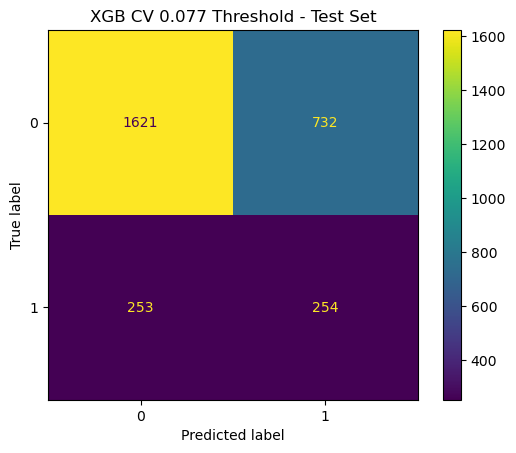

In [57]:
cm = confusion_matrix(y_test, new_preds, labels=xgb_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)
disp.plot()
plt.title("XGB CV 0.077 Threshold - Test Set")
plt.show()

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.